<a href="https://colab.research.google.com/github/naenumtou/ifrs9/blob/main/PD/clusterSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Set auto reload
%reload_ext autoreload
%autoreload 2

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Config
%config InlineBackend.figure_format = 'retina' #Retina display
plt.style.use('seaborn-deep') #Plot style

In [3]:
# Import cluster result
df = pd.read_csv(
    'https://raw.githubusercontent.com/naenumtou/ifrs9/main/PD/datasets/varClusResult.csv'
)

# Show table
df.head(10)

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio,Correlation,Group
0,1,GDP_C_lg12,0.871101,0.497752,0.256645,-0.808461,GDP
1,1,GDP_C_lg11,0.896155,0.745034,0.407289,-0.798710,GDP
2,1,MPI_C_lg12,0.858329,0.471213,0.267916,-0.795060,MPI
3,1,MPI_C_lg11,0.808024,0.547071,0.423854,-0.749703,MPI
4,1,RSI_C_lg12,0.775689,0.668334,0.676318,-0.657134,RSI
5,1,MPI_C_lg10,0.803650,0.637253,0.541286,-0.651218,MPI
6,1,PCI_C_lg12,0.668555,0.406091,0.558073,-0.615780,PCI
7,2,CPI_M9_lg6,0.997148,0.160277,0.003397,0.520188,CPI
8,2,CPI_M9_lg5,0.969731,0.138374,0.035130,0.516172,CPI
9,2,CPI_M12_lg4,0.974139,0.160082,0.030790,0.510209,CPI


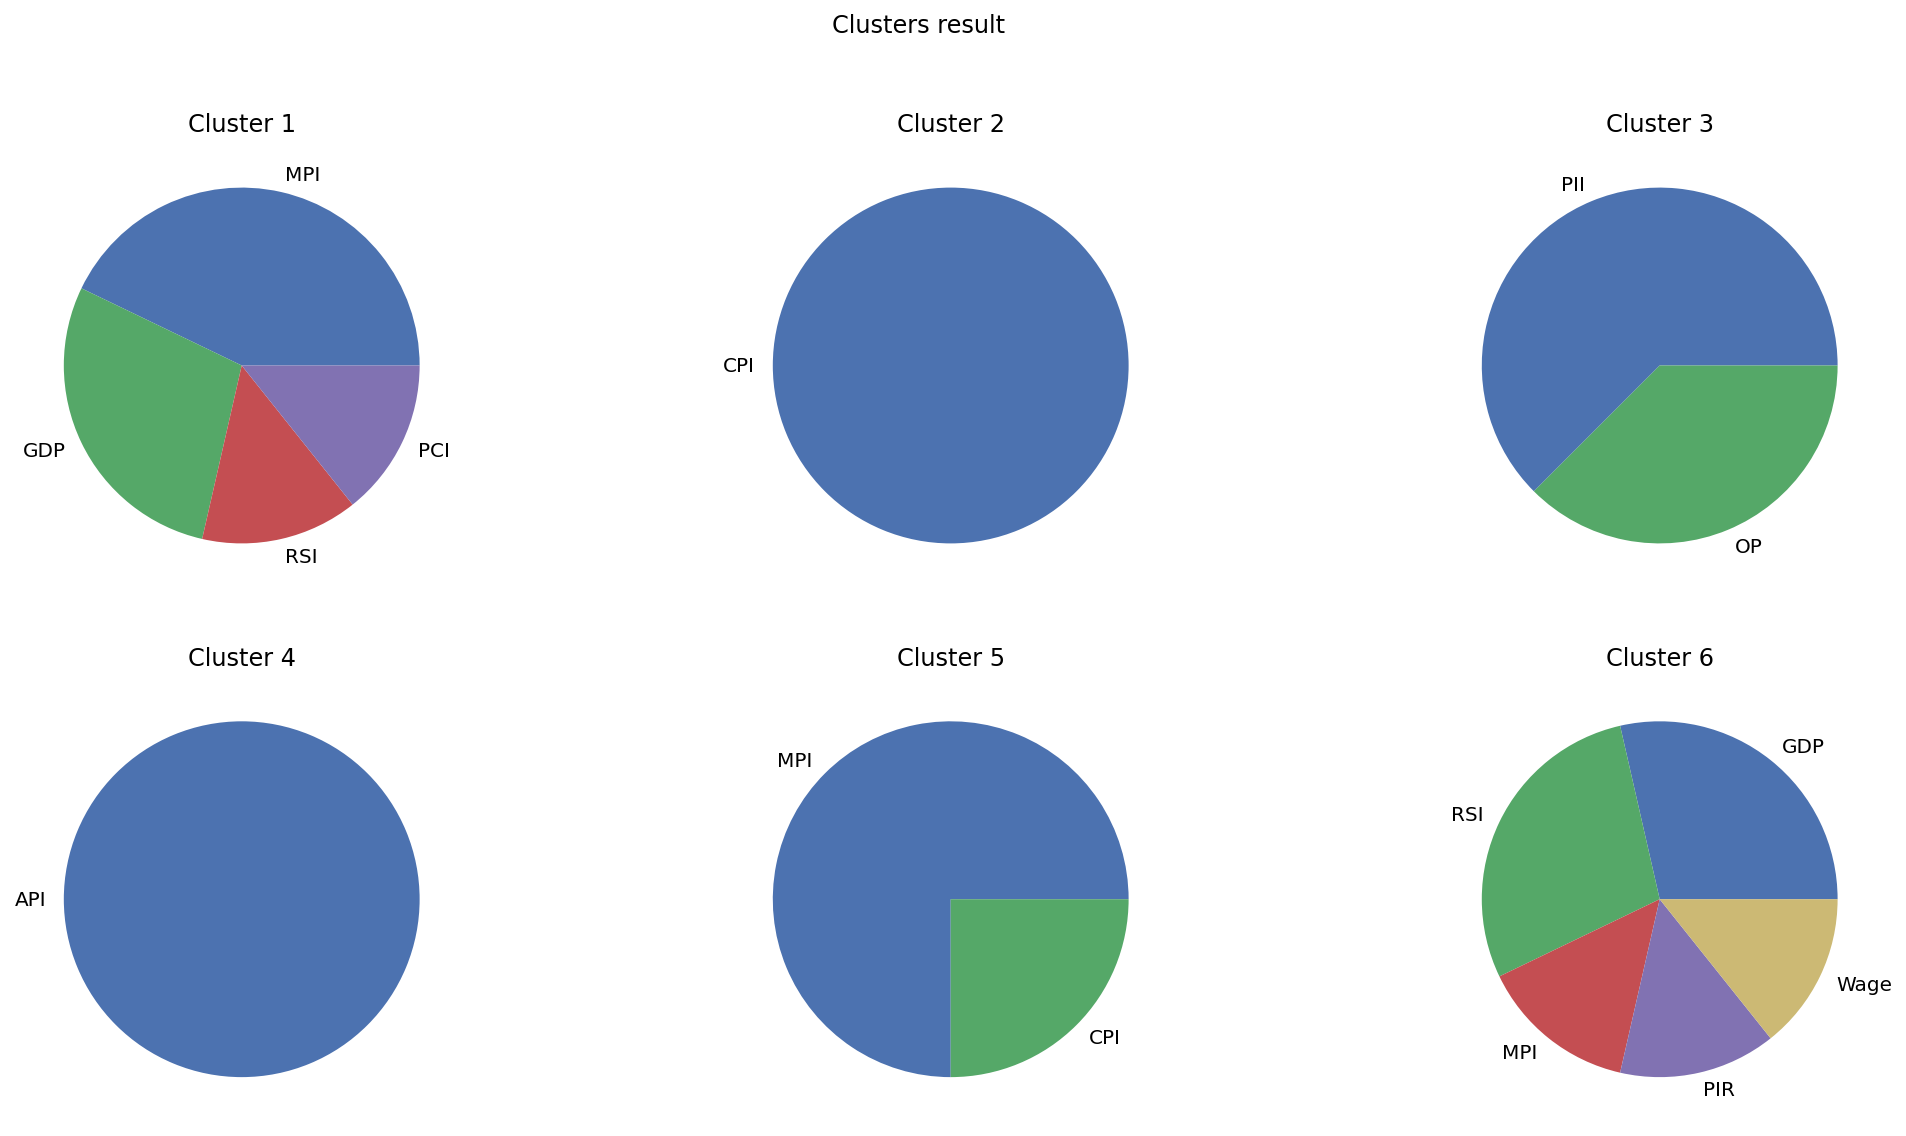

In [4]:
# Plot
fig, axs = plt.subplots(
    2, 3,
    figsize = (18, 9),
    sharex = True
)
fig.suptitle('Clusters result')
axs = axs.ravel()
for i in range(df['Cluster'].nunique()):
  data = df.query(
      "Cluster == @i + 1"
  )
  axs[i].set_title(f'Cluster {i + 1}')
  axs[i].pie(
      data['Group'].value_counts(),
      labels = data['Group'].value_counts().index
  )
plt.show()

In [5]:
# Selection with condition
'''
The selection based on 1 lowest R-Square Ratio and 1 highest correlation.
However, there are some unpreferable variables.
Thus, the condition will be ignored unpreferable variables.
'''

# List of unpreferable variables
unUseVars = ['CPI', 'PII']

In [6]:
# Create condition
mask0 = df['Group'].isin(unUseVars) #Mask for unpreferable variables
mask1 = df.groupby(['Cluster'])['Group'].transform('nunique').ne(1) #Condition to check unique set of variable
mask2 = (
    -df['Cluster'].isin(
        df.loc[-mask0, 'Cluster']
    ) | mask0
) & mask1 #Select masked DataFrame

In [7]:
# Explain condition
dfExplain = df.copy()
dfExplain = dfExplain.assign(
    NotpreferVar = mask0,
    CheckUnique = mask1,
    NotpreferClsuter = ~df['Cluster'].isin(df.loc[~mask0, 'Cluster']),
    FinalCheck = ~mask2

)

# Show table
dfExplain

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio,Correlation,Group,NotpreferVar,CheckUnique,NotpreferClsuter,FinalCheck
0,1,GDP_C_lg12,0.871101,0.497752,0.256645,-0.808461,GDP,False,True,False,True
1,1,GDP_C_lg11,0.896155,0.745034,0.407289,-0.798710,GDP,False,True,False,True
2,1,MPI_C_lg12,0.858329,0.471213,0.267916,-0.795060,MPI,False,True,False,True
3,1,MPI_C_lg11,0.808024,0.547071,0.423854,-0.749703,MPI,False,True,False,True
4,1,RSI_C_lg12,0.775689,0.668334,0.676318,-0.657134,RSI,False,True,False,True
5,1,MPI_C_lg10,0.803650,0.637253,0.541286,-0.651218,MPI,False,True,False,True
6,1,PCI_C_lg12,0.668555,0.406091,0.558073,-0.615780,PCI,False,True,False,True
7,2,CPI_M9_lg6,0.997148,0.160277,0.003397,0.520188,CPI,True,False,True,True
8,2,CPI_M9_lg5,0.969731,0.138374,0.035130,0.516172,CPI,True,False,True,True
9,2,CPI_M12_lg4,0.974139,0.160082,0.030790,0.510209,CPI,True,False,True,True


In [8]:
# Apply to DataFrame
df['ABSCorrelation'] = abs(df['Correlation']) #Transform to absolute value

df['RankRatio'] = df[-mask2].groupby(['Cluster'])['RS_Ratio'].rank(
    method = 'first',
    ascending = True
)

df['RankCorrelation'] = df[-mask2].groupby(['Cluster'])['ABSCorrelation'].rank(
    method = 'first',
    ascending = False
)

# Show table
df

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio,Correlation,Group,ABSCorrelation,RankRatio,RankCorrelation
0,1,GDP_C_lg12,0.871101,0.497752,0.256645,-0.808461,GDP,0.808461,1.0,1.0
1,1,GDP_C_lg11,0.896155,0.745034,0.407289,-0.798710,GDP,0.798710,3.0,2.0
2,1,MPI_C_lg12,0.858329,0.471213,0.267916,-0.795060,MPI,0.795060,2.0,3.0
3,1,MPI_C_lg11,0.808024,0.547071,0.423854,-0.749703,MPI,0.749703,4.0,4.0
4,1,RSI_C_lg12,0.775689,0.668334,0.676318,-0.657134,RSI,0.657134,7.0,5.0
5,1,MPI_C_lg10,0.803650,0.637253,0.541286,-0.651218,MPI,0.651218,5.0,6.0
6,1,PCI_C_lg12,0.668555,0.406091,0.558073,-0.615780,PCI,0.615780,6.0,7.0
7,2,CPI_M9_lg6,0.997148,0.160277,0.003397,0.520188,CPI,0.520188,1.0,1.0
8,2,CPI_M9_lg5,0.969731,0.138374,0.035130,0.516172,CPI,0.516172,7.0,2.0
9,2,CPI_M12_lg4,0.974139,0.160082,0.030790,0.510209,CPI,0.510209,5.0,3.0


In [9]:
# Selection
df['Select'] = np.where(
    (
        (df['RankRatio'] <= 1) |
        (df['RankCorrelation'] <= 1)
    ),
    1,
    0    
)

# Show table
df.query(
    "Select == 1"
)

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio,Correlation,Group,ABSCorrelation,RankRatio,RankCorrelation,Select
0,1,GDP_C_lg12,0.871101,0.497752,0.256645,-0.808461,GDP,0.808461,1.0,1.0,1
7,2,CPI_M9_lg6,0.997148,0.160277,0.003397,0.520188,CPI,0.520188,1.0,1.0,1
18,3,OP_C,0.888969,0.518083,0.230395,-0.612120,OP,0.612120,3.0,1.0,1
21,3,OP_C_lg1,0.925313,0.462996,0.139080,-0.566471,OP,0.566471,1.0,2.0,1
25,4,API_C_lg8,0.954485,0.147321,0.053379,-0.548191,API,0.548191,1.0,1.0,1
29,5,MPI_M12_lg4,0.971331,0.486758,0.055858,-0.507274,MPI,0.507274,1.0,1.0,1
32,6,GDP_C_lg10,0.915136,0.739259,0.325472,-0.700410,GDP,0.700410,2.0,1.0,1
34,6,GDP_C_lg9,0.915693,0.553116,0.188656,-0.574610,GDP,0.574610,1.0,3.0,1


In [10]:
# Export
df.to_csv(
    'varClusConditionResult.csv',
    index = False
)